# Projeto 3 - 3a Etapa

## Luca Noto e Yago Labate

In [227]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

import matplotlib.patches as mpatches

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/lucanoto/Desktop/2˚ Semestre/Ciência dos Dados/CD/projeto3/entrega3


### Abrindo os dados selecionados na 1a etapa

In [224]:
dados = pd.read_excel('../entrega1/Datasets/dados_preparados2.xls')

In [225]:
dados.head()

,PAIS,MORTALIDADE,CALORIES_INTAKE,SANEAMENTO
3,Albania,23.6,2864.93,86
4,Algeria,37.8,3034.33,93
7,Angola,211.7,1833.90,46
9,Antigua and Barbuda,14.1,2073.33,95
10,Argentina,19.2,2965.90,90


# 1-Análise descritiva dos Dados

In [8]:
dados.describe()

,MORTALIDADE,CALORIES_INTAKE,SANEAMENTO
count,166.000000,166.000000,166.000000
mean,54.688735,2665.903494,68.192771
std,54.227033,519.023599,31.283632
min,3.600000,1508.540000,7.000000
25%,12.750000,2245.917500,43.250000
50%,30.950000,2655.525000,80.000000
75%,87.950000,3048.135000,97.000000
max,223.900000,3753.780000,100.000000


In [144]:
print('Correlação entre as variáveis:')
dados.corr(method='pearson')

Correlação entre as variáveis


,MORTALIDADE,CALORIES_INTAKE,SANEAMENTO,CONTINENTE,MORTALIDADE_LOG
MORTALIDADE,1.000000,-0.696961,-0.841141,-0.337740,0.899240
CALORIES_INTAKE,-0.696961,1.000000,0.704450,0.302897,-0.804267
SANEAMENTO,-0.841141,0.704450,1.000000,0.282502,-0.851165
CONTINENTE,-0.337740,0.302897,0.282502,1.000000,-0.338670
MORTALIDADE_LOG,0.899240,-0.804267,-0.851165,-0.338670,1.000000


### Análise gráfica dos Dados

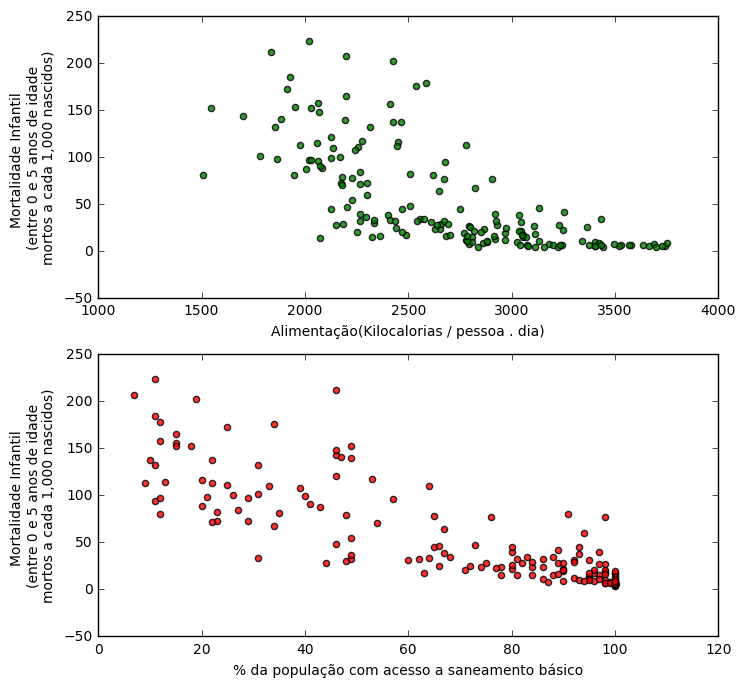

In [229]:
%matplotlib inline

f, ax = plt.subplots(2,figsize=(8,8))

ax[0].scatter(dados.CALORIES_INTAKE, dados.MORTALIDADE, c='green', alpha=0.8)
ax[0].set_xlabel("Alimentação(Kilocalorias / pessoa . dia)")
ax[0].set_ylabel("Mortalidade Infantil "'\n'"(entre 0 e 5 anos de idade"'\n'"mortos a cada 1,000 nascidos)")

ax[1].scatter(dados.SANEAMENTO, dados.MORTALIDADE, c='red', alpha=0.8)
ax[1].set_xlabel("% da população com acesso a saneamento básico")
ax[1].set_ylabel("Mortalidade Infantil "'\n'"(entre 0 e 5 anos de idade"'\n'"mortos a cada 1,000 nascidos)")

### Adicionando uma coluna com os logs da Mortalidade no dataframe 

#### Análise descritiva dos Dados

In [236]:
dados.describe()

,MORTALIDADE,CALORIES_INTAKE,SANEAMENTO,MORTALIDADE_LOG
count,166.000000,166.000000,166.000000,166.000000
mean,54.688735,2665.903494,68.192771,3.436908
std,54.227033,519.023599,31.283632,1.142555
min,3.600000,1508.540000,7.000000,1.280934
25%,12.750000,2245.917500,43.250000,2.543743
50%,30.950000,2655.525000,80.000000,3.432361
75%,87.950000,3048.135000,97.000000,4.476745
max,223.900000,3753.780000,100.000000,5.411200


In [238]:
print('Correlação entre as variáveis:')
dados.corr(method='pearson')

Correlação entre as variáveis:


,MORTALIDADE,CALORIES_INTAKE,SANEAMENTO,MORTALIDADE_LOG
MORTALIDADE,1.000000,-0.696961,-0.841141,0.899240
CALORIES_INTAKE,-0.696961,1.000000,0.704450,-0.804267
SANEAMENTO,-0.841141,0.704450,1.000000,-0.851165
MORTALIDADE_LOG,0.899240,-0.804267,-0.851165,1.000000


#### Análise gráfica dos dados

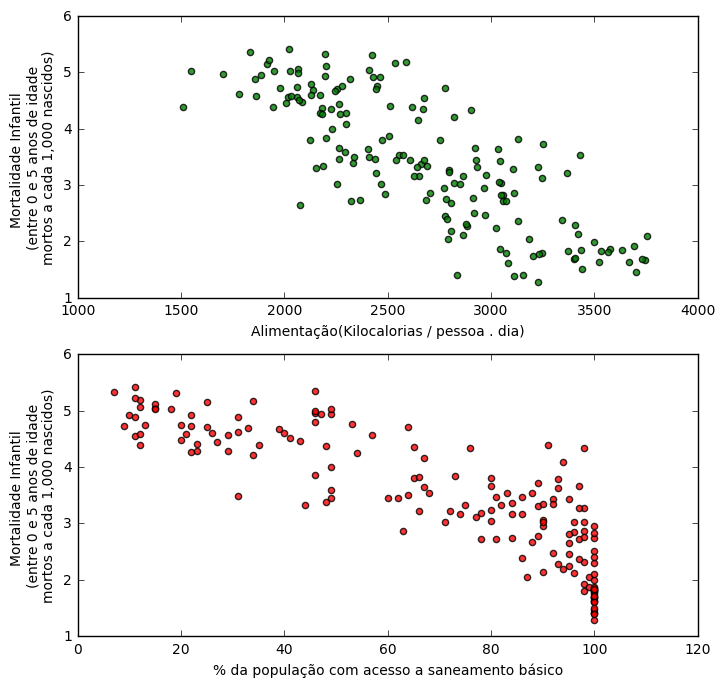

In [232]:
%matplotlib inline

f, ax = plt.subplots(2,figsize=(8,8))

ax[0].scatter(dados.CALORIES_INTAKE, dados.MORTALIDADE_LOG, c='green', alpha=0.8)
ax[0].set_xlabel("Alimentação(Kilocalorias / pessoa . dia)")
ax[0].set_ylabel("Mortalidade Infantil "'\n'"(entre 0 e 5 anos de idade"'\n'"mortos a cada 1,000 nascidos)")

ax[1].scatter(dados.SANEAMENTO, dados.MORTALIDADE_LOG, c='red', alpha=0.8)
ax[1].set_xlabel("% da população com acesso a saneamento básico")
ax[1].set_ylabel("Mortalidade Infantil "'\n'"(entre 0 e 5 anos de idade"'\n'"mortos a cada 1,000 nascidos)")

## Conclusão das análises:

Pelas análises realizadas após a adição da coluna 'MORTALIDADE_LOG' decidimos utilizá-la como variável resposta, visto que os gráficos em que esta aparece apresenta uma maior correlação com ambas variáveis explicativas, o que é visível pela segunda série de gráficos e tabelas. 

#### Temos assim um modelo de Regressão Linear Múltipla Log-Lin-Lin:

$$ln(Mortalidade Infantil) = \beta0 + \beta1Saneamento + \beta2ConsumoCalorico + \varepsilon$$

# 2-Ajustando um modelo de Regressão Múltipla 

In [145]:
model = sm.ols(formula='MORTALIDADE_LOG ~ SANEAMENTO + CALORIES_INTAKE', data = dados)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MORTALIDADE_LOG   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     342.2
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           4.53e-59
Time:                        15:42:56   Log-Likelihood:                -120.35
No. Observations:                 166   AIC:                             246.7
Df Residuals:                     163   BIC:                             256.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           7.2283      0.220     32.820      0.000         6.793     7.663
SANEAMENTO         -0.0206      0.002    -11.672      0.000        -0.024    -0.017
CALORIES_INTAKE    -0.0009      0.000     -8.394      0.000        -0.001    -0.001
==============================================================================
Omnibus:                        3.026   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.645
Skew:                           0.299   Prob(JB):                        0.266
Kurtosis:                       3.155   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pelo modelo de Regressão adotado, temos que:

$\beta0$ = 7.2283

$\beta1$ = -0.0206

$\beta2$ = -0.0009

Além disso, podemos ver que o valor-p dos 3 parâmetros é 0. Como nossa Hipótese inicial é de $\beta0$ = $\beta1$ = $\beta2$ = 0, mesmo com um $\alpha$ baixíssimo, não podemos afirmar que estes parâmetros não são relevantes ao modelo, ou melhor , podemos afirmar com um grau de confiança altíssimo que os parâmetros obtidos são relevantes ao modelo

# 3-Verificando a adequação das suposições e a qualidade do ajuste 

Podemos verificar o ajuste por meio da análise do Coeficiente de Determinação (R-Squared) também fornecido pelo método OLS. Este coeficiente mede quanto o modelo de regressão se aproxima dos pontos reais. No nosso caso este coeficiente é 80,8%, um valor significante.

Podemos verificar graficamente também:

<IPython.core.display.Javascript object>


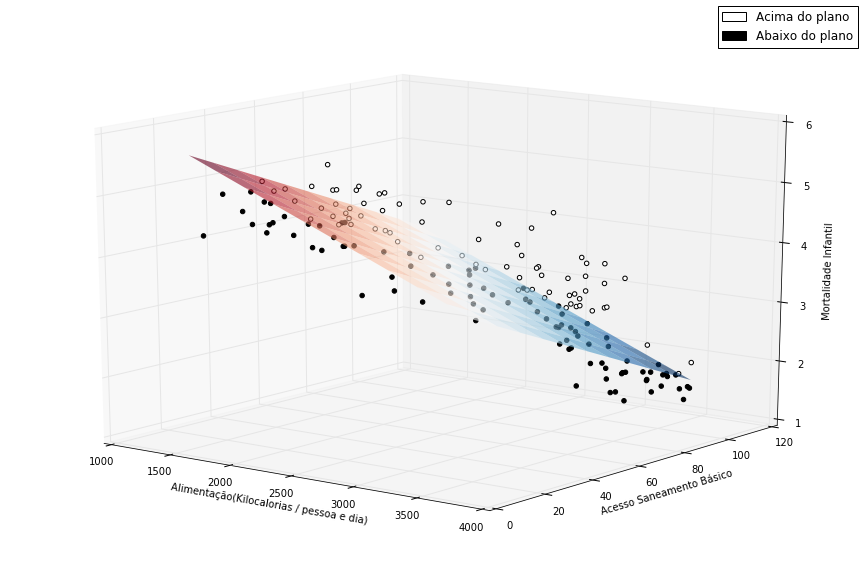

In [249]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D


X = dados[['CALORIES_INTAKE', 'SANEAMENTO']]
y = dados['MORTALIDADE_LOG']


X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.CALORIES_INTAKE.min(), X.CALORIES_INTAKE.max(), 100), 
                       np.linspace(X.SANEAMENTO.min(), X.SANEAMENTO.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].CALORIES_INTAKE, X[resid >= 0].SANEAMENTO, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].CALORIES_INTAKE, X[resid < 0].SANEAMENTO, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Alimentação(Kilocalorias / pessoa e dia)')
ax.set_ylabel('Acesso Saneamento Básico')
ax.set_zlabel('Mortalidade Infantil')

white_patch = mpatches.Patch(facecolor='white', label='Acima do plano',edgecolor= 'black', linewidth=1, )
black_patch = mpatches.Patch(color='black', label='Abaixo do plano')
plt.legend(handles=[white_patch,black_patch])
plt.show()

# 4-Interpretação dos Parâmetros Estimados:

#### $\beta0$ $(Intercepto)$ estimado

O intercepto é o valor previsto a Mortalidade Infantil quando 0% da população tiver acesso a saneamento básico e o consumo médio de calorias por dia e pessoa for de 0 calorias/dia.pessoa.
Como não faz muito sentido zerar ambas variáveism (pois não ;e uma situação real) $\beta0$ não é muito interessante para a análise.

### Como temos um modelo Log-Lin-Lin, devemos tomar cuidado na hora de interpretar os coeficientes angulares ( $\beta1$ e $\beta2$) obtidos. Neste caso a interpretação correta seria a de que:
###  A cada variação ∆𝑥 na variável explicativa 𝑥 , $\beta1$ e $\beta2$ têm interpretação de variação percentual prevista na variável resposta quando multiplicado por 100. Assim:

#### $\beta1$ estimado

A cada 1 ponto percentual a mais da população que tem acesso a saneamento básico, a Mortalidade Infantil diminui, em média 2,06%. 

#### $\beta2$ estimado

A cada 1 kilocaloria, em média, a mais por pessoa e dia , a Mortalidade Infantil diminui, em média, 0,09% ou A cada 100 kilocalorias, em média, a mais por pessoa e dia , a Mortalidade Infantil diminiu, em média, 9%

# 5-Objetivos, Modelo de Ajuste e Interpretação das estimativas.

### Objetivos

O objetivo do grupo ao escolher as variáveis era responder a seguinte pergunta: 
#### O consumo médio diário de calorias por pessoa e o acesso ao saneamento básico afetam a Mortalidade Infantil de alguma forma?
Selecionamos estas duas variáveis explicativas pois encontramos algumas matérias e estudos que relacionavam estas à nossa variável resposta:

http://www.unwater.org/wwd08/docs/kids-sanitation.pdf

https://www.unicef.org/sowc08/docs/sowc08_panels.pdf

https://www.usaid.gov/what-we-do/global-health/nutrition/role-nutrition-ending-preventable-child-maternal-deaths



### Modelo de Ajuste

Visto que os parâmetros $\beta0$, $\beta1$ e $\beta2$ eram desconhecidos foi utilizado o método dos mínimos quadrados para estimar esse parâmetros visto que com estre conseguimos minimizar o ruído que é causado pela diferença entre o valor verdadeiro de 𝑦 e seu valor estimado 𝑦ˆ. Além disso podemos afirmar que o modelo ajustado parece ser bastante verossímil, visto a análise gráfica e o valor de R-Squared retornado.

### Interpretação das Estimativas

O valor estimado de $\beta0$ não é interessante para a análise. 

O valor estimado de $\beta1$ mostra que a cada 1 ponto percentual a mais da população que tem acesso a saneamento básico, a Mortalidade Infantil diminui, em média 2,06%.

O valor estimado de $\beta2$ mostra que a cada 100 kilocalorias, em média, a mais por pessoa e dia , a Mortalidade Infantil diminiu, em média, 9%

# 6-O modelo de regressão múltipla obtido é igualmente bom quando os países são separados em subgrupos?

## Critério de subgrupos escolhido: Continentes

### Criando a lista com os países pertencentes a cada continente

In [92]:
n_america = ["Antigua and Barbuda",
"Bahamas","Barbados","Belize",
"Canada","Costa Rica",
"Cuba","Dominica",
"Dominican Republic","El Salvador",
"Grenada","Guatemala",
"Haiti","Honduras",
"Jamaica","Mexico",
"Nicaragua","Panama",
"Saint Kitts and Nevis","Saint Lucia",
"Saint Vincent and the Grenadines",
"Trinidad and Tobago","United States"]

africa = ["Algeria","Angola",
"Benin","Botswana",
"Burkina","Burundi",
"Cameroon","Cape Verde",
"Central African Republic","Chad",
"Comoros","Congo",
"Democratic Republic of Congo","Djibouti",
"Egypt","Equatorial Guinea",
"Eritrea","Ethiopia",
"Gabon","Gambia",
"Ghana","Guinea",
"Guinea-Bissau","Ivory Coast",
"Kenya","Lesotho",
"Liberia","Libya",
"Madagascar","Malawi",
"Mali","Mauritania",
"Mauritius","Morocco",
"Mozambique","Namibia",
"Niger","Nigeria",
"Rwanda","Sao Tome and Principe",
"Senegal","Seychelles",
"Sierra Leone","Somalia",
"South Africa","South Sudan",
"Sudan","Swaziland",
"Tanzania","Togo",
"Tunisia","Uganda",
"Zambia","Zimbabwe"]

asia = ["Afghanistan","Bahrain",
"Bangladesh","Bhutan",
"Brunei","Burma (Myanmar)",
"Cambodia","China",
"East Timor","India",
"Indonesia","Iran",
"Iraq","Israel",
"Japan","Jordan",
"Kazakhstan","North Korea",
"South Korea","Kuwait",
"Kyrgyzstan","Laos",
"Lebanon","Malaysia",
"Maldives","Mongolia",
"Nepal","Oman",
"Pakistan","Philippines",
"Qatar","Russian Federation",
"Saudi Arabia","Singapore",
"Sri Lanka","Syria",
"Tajikistan","Thailand",
"Turkey","Turkmenistan",
"United Arab Emirates","Uzbekistan",
"Vietnam","Yemen"]

europe = ['Albania',
 'Andorra','Armenia',
 'Austria','Azerbaijan',
 'Belarus','Belgium',
 'Bosnia and Herzegovina','Bulgaria',
 'Croatia','Cyprus',
 'Czech','Republic',
 'Denmark','Estonia',
 'Finland','France',
 'Georgia','Germany',
 'Greece','Hungary',
 'Iceland','Ireland',
 'Italy','Latvia',
 'Liechtenstein','Lithuania',
 'Luxembourg','Macedonia',
 'Malta','Moldova',
 'Monaco','Montenegro',
 'Netherlands','Norway',
 'Poland','Portugal',
 'Romania','San',
 'Marino','Serbia',
 'Slovakia','Slovenia',
 'Spain','Sweden',
 'Switzerland','Ukraine',
 'United Kingdom','Vatican City']

oceania = ['Australia',
 'Fiji','Kiribati',
 'Marshall','Islands',
 'Micronesia','Nauru',
 'New Zealand','Palau',
 'Papua New Guinea','Samoa',
 'Solomon Islands','Tongas
 'Tuvalu','Vanuatu']

s_america = ['Argentina','Bolivia',
 'Brazil','Chile',
 'Colombia',
 'Ecuador','Guyana',
 'Paraguay',
 'Peru','Suriname',
 'Uruguay','Venezuela']

### Criando a coluna 'CONTINENTE' no dataframe 

In [251]:
dados["CONTINENTE"] = 0*dados.MORTALIDADE

### Distribuindo os países em seus respectivos continentes

In [252]:
for i in range(len(dados)):
        if dados.PAIS[dados.index[i]] in n_america:
            dados.set_value(dados.index[i], 'CONTINENTE', 1)
            
        elif dados.PAIS[dados.index[i]] in africa:
            dados.set_value(dados.index[i], 'CONTINENTE', 2)
            
        elif dados.PAIS[dados.index[i]] in asia:
            dados.set_value(dados.index[i], 'CONTINENTE', 3)
            
        elif dados.PAIS[dados.index[i]] in europe:
            dados.set_value(dados.index[i], 'CONTINENTE', 4)
            
        elif dados.PAIS[dados.index[i]] in oceania:
            dados.set_value(dados.index[i], 'CONTINENTE', 5)
            
        elif dados.PAIS[dados.index[i]] in s_america:
            dados.set_value(dados.index[i], 'CONTINENTE', 6)
            
        else: 
            dados.set_value(dados.index[i], 'CONTINENTE', 0)
            

### Verificando a distribuição

In [253]:
dados.head()

,PAIS,MORTALIDADE,CALORIES_INTAKE,SANEAMENTO,MORTALIDADE_LOG,CONTINENTE
3,Albania,23.6,2864.93,86,3.161247,4.0
4,Algeria,37.8,3034.33,93,3.632309,2.0
7,Angola,211.7,1833.90,46,5.355170,2.0
9,Antigua and Barbuda,14.1,2073.33,95,2.646175,1.0
10,Argentina,19.2,2965.90,90,2.954910,6.0


### Plotando o Gráfico

<IPython.core.display.Javascript object>


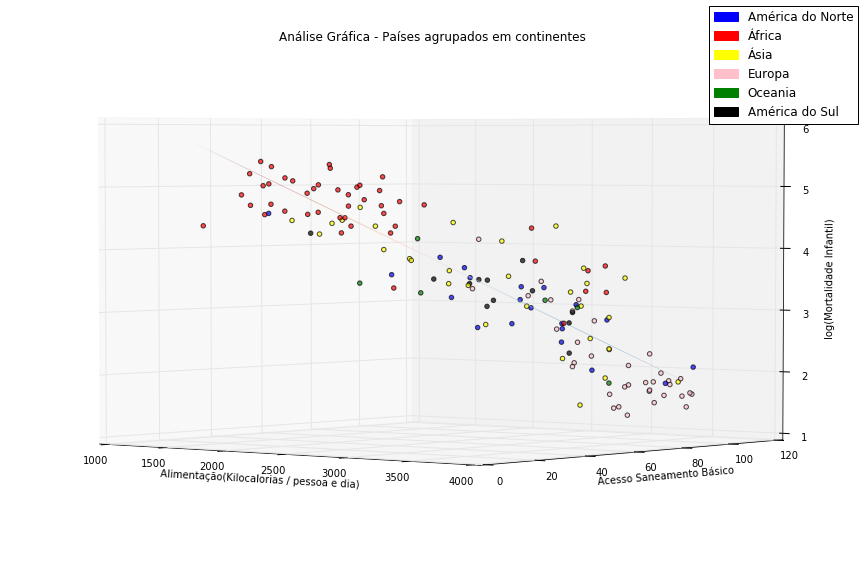

In [259]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D


X = dados[['CALORIES_INTAKE', 'SANEAMENTO']]
y = dados['MORTALIDADE_LOG']


X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.CALORIES_INTAKE.min(), X.CALORIES_INTAKE.max(), 100), 
                       np.linspace(X.SANEAMENTO.min(), X.SANEAMENTO.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(dados.CALORIES_INTAKE[dados.CONTINENTE==1], dados.SANEAMENTO[dados.CONTINENTE==1],dados.MORTALIDADE_LOG[dados.CONTINENTE==1],c='blue',marker='o',alpha=0.7)
ax.scatter(dados.CALORIES_INTAKE[dados.CONTINENTE==2], dados.SANEAMENTO[dados.CONTINENTE==2],dados.MORTALIDADE_LOG[dados.CONTINENTE==2],c='red',marker='o',alpha=0.7)
ax.scatter(dados.CALORIES_INTAKE[dados.CONTINENTE==3], dados.SANEAMENTO[dados.CONTINENTE==3],dados.MORTALIDADE_LOG[dados.CONTINENTE==3],c='yellow',marker='o',alpha=0.7)
ax.scatter(dados.CALORIES_INTAKE[dados.CONTINENTE==4], dados.SANEAMENTO[dados.CONTINENTE==4],dados.MORTALIDADE_LOG[dados.CONTINENTE==4],c='pink',marker='o',alpha=0.7)
ax.scatter(dados.CALORIES_INTAKE[dados.CONTINENTE==5], dados.SANEAMENTO[dados.CONTINENTE==5],dados.MORTALIDADE_LOG[dados.CONTINENTE==5],c='green',marker='o',alpha=0.7)
ax.scatter(dados.CALORIES_INTAKE[dados.CONTINENTE==6], dados.SANEAMENTO[dados.CONTINENTE==6],dados.MORTALIDADE_LOG[dados.CONTINENTE==6],c='black',marker='o',alpha=0.7)


plt.title('Análise Gráfica - Países agrupados em continentes')
ax.set_xlabel('Alimentação(Kilocalorias / pessoa e dia)')
ax.set_ylabel('Acesso Saneamento Básico')
ax.set_zlabel('log(Mortalidade Infantil)')

blue_patch = mpatches.Patch(color='blue', label='América do Norte')
red_patch = mpatches.Patch(color='red', label='África')
yellow_patch = mpatches.Patch(color='yellow', label='Ásia')
pink_patch = mpatches.Patch(color='pink', label='Europa')
green_patch = mpatches.Patch(color='green', label='Oceania')
black_patch = mpatches.Patch(color='black', label='América do Sul')
plt.legend(handles=[blue_patch,red_patch,yellow_patch,pink_patch,green_patch,black_patch])

plt.show()

Analisando o gráfico acima podemos perceber 2 coisas:

        1- O modelo parece explicar bem a relação entre as três variaveis em 4 continentes: Oceania, Ásia, América do Norte e América do Sul. Podemos afirmar isso pois olhando os pontos dos países pertencentes a esses continentes no gráfico acima, percebemos que estes estão bem distribuídos em torno de toda a extensão do plano traçado.

        2- O modelo não parece explicar bem a relação entre as variáveis na África ou Europa, visto que a maioria dos países pertencentes a esses continentes se concentram nos extremos do plano traçado. Os países africanos tem, em geral, um alto índice de Mortalidade Infantil, e o acesso ao saneamento básico ou a quantidade diária média de calorias ingeridas por pessoa não parecem afetar muito este índice, isso ocorre pois há outros fatores de mais peso para a mortalidade infantil que são deficientes no continente, como o acesso a medicamentos e hospitais, por exemplo.
        Na Europa podemos perceber o inverso: Os países se concentram na parte inferior do planop, pu seja, tem uma baixa mortalidade infantil, e a variação das variáveis explicativas não afeta muito esse índice. Isso ocorre provavelmente pois há outros fatores que influenciam na Mortalidade Infantil e são garantidos em geral a toda população européia, como um acesso a saúde pública de qualidade, por exemplo.


# 7-Conclusão sobre o Estudo

        O projeto 3 tinha como objetivo selecionar uma variável resposta e duas explicativas e, por meio da regressão linear múltipla, buscar uma relação entre as 3. O método de regressão utilizado foi o Método dos Mínimos Quadrados, visto que os parâmetros $\beta0$, $\beta1$ e $\beta2$ eram desconhecidos e com este conseguimos minimizar o ruído que é causado pela diferença entre o valor verdadeiro de 𝑦 e seu valor estimado 𝑦ˆ. O modelo se provou adequado por meio da análise do coeficientre R-Squared e das análises Gráficas, que coincidem com o gráficos extraidos do banco de dados(https://www.gapminder.org).
        A análise dos coeficientes estimados pela regressão nos indicam que o acesso ao saneamento básico e a quantidade média de calorias ingeridas por pessoa diariamente em um país tem grande influência na taxa de Mortalidade Infantil do mesmo, visto que o consumo de mais 100kcal (o que reopresenta apenas 5% do valor diário recomendado) pode diminuir em 9% a taxa de mortalidade de um país, ou a ampliação do acesso a saneamento básico em 1% pode diminuir em 2% a mesma taxa. Estas conclusões podem ser confirmadas pois já há estudos que chegaram em resultados parecidos (http://www.unwater.org/wwd08/docs/kids-sanitation.pdf, https://www.unicef.org/sowc08/docs/sowc08_panels.pdf), o que elimina a possibilidade de correlação espúria ou outras explicações.
        Apesar do Modelo ter se provado adequado para os dados em geral, quando agrupamos os países por continente a qual pertencem, percebemos que há certos continentes no qual o acesso ao saneamento básico e a quantidade média de calorias ingeridas por pessoa diariamente não parecem afetar a Taxa de Mortalidade Infantil, como é o caso da África e da Europa. Esses casos isolados podem ser explicados pela atuação de outras variáveis explicativas que interferam na taxa de Mortalidade Infantil.